In [27]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy import linalg as LA

## $\textbf{Parte 2}$ 

In [93]:
def function(x,y):
    f = -np.exp(-((x-1)**2+(y-1)**2)/(0.3**2))-0.5*(np.exp(-16*((x-2)**2+(y-2)**2)))
    return f

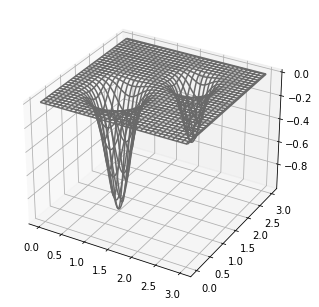

In [94]:
X = np.linspace(-0,3,500)
Y = np.linspace(-0,3,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X, Y, Z, rstride=15, cstride=15, color = 'dimgrey')
plt.savefig("grafico.png")
plt.show()

In [110]:
def grad_function(x,y):
    delta = 0.01
    dx = (function(x,y)-function(x+delta,y))/delta
    dy = (function(x,y)-function(x,y+delta))/delta
    return dx, dy

In [109]:
def norma(x, y):    
    delta = 0.01
    dx = (function(x,y)-function(x+delta,y))/delta
    dy = (function(x,y)-function(x,y+delta))/delta
    normax = dx/LA.norm(dx+dy)
    normay = dy/LA.norm(dx+dy)
    return normax,normay

In [98]:
def metropolis_hasting(Temp,x1,y1,x2,y2):
    if function(x1,y1) > function(x2,y2):
        return 1
    else:
        return np.exp(-(function(x2,y2)-function(x1,y1))/Temp)

In [297]:
def simulated_annealing(n,T_i,beta,xi,yi):
    xs = [xi]
    ys = [yi]
    zs = [function(xi,yi)]
    for i in range(2,n):
        xt,yt =norma(xi,yi)
        x2 = xi - T_i*xt +(np.random.uniform(1,1.5)*np.random.uniform()-np.random.uniform(0,0.5))
        y2 = yi - T_i*yt +(np.random.uniform(1,1.5)*np.random.uniform()-np.random.uniform(0,0.5))
        if np.random.uniform() < metropolis_hasting(T_i,xi,yi,x2,y2):
            xi = x2
            yi = y2
        xs.append(x2)
        ys.append(y2)
        zs.append(function(x2,y2))
        T_i = T_i*np.random.uniform(0,0.1)
    return xs,ys,zs

In [300]:
xs, ys, zs = simulated_annealing(100,2,np.random.uniform(),0.3,0.5)

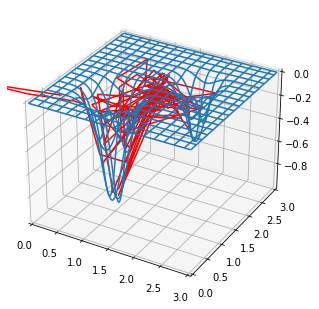

In [301]:
X = np.linspace(-0,3,500)
Y = np.linspace(-0,3,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(xs, ys, zs, color = "red")
ax.plot_wireframe(X, Y, Z, rstride=30, cstride=30)
plt.xlim(-0,3)
plt.ylim(-0,3)
plt.savefig("pos_simulated_annealing.png")
plt.show()

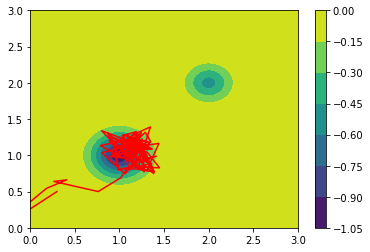

In [277]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)
ax.plot(xs,ys,color = 'red')
plt.xlim(0,3)
plt.ylim(0,3)
plt.savefig("map_simulated_annealing.png")
plt.show()

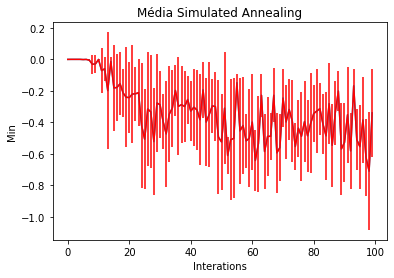

In [280]:
t = [i for i in range(len(xs))]
xs1, ys1, zs1 = simulated_annealing(100,1.5,np.random.uniform(),0.3,0.5)
xs2, ys2, zs2 = simulated_annealing(100,1.5,np.random.uniform(),0.3,0.5)
xs3, ys3, zs3 = simulated_annealing(100,1.5,np.random.uniform(),0.3,0.5)
xs4, ys4, zs4 = simulated_annealing(100,1.5,np.random.uniform(),0.3,0.5)
xs5, ys5, zs5 = simulated_annealing(100,1.5,np.random.uniform(),0.3,0.5)
zs_mean1 = [np.mean(i) for i in zip(zs1,zs2,zs3,zs4,zs5)]
zs_std1 = [np.std(i) for i in zip(zs1,zs2,zs3,zs4,zs5)]
plt.plot(t,zs_mean1)
plt.errorbar(t, zs_mean1, zs_std1,color = 'red')
plt.title("Média Simulated Annealing")
plt.xlabel('Interations')
plt.ylabel('Min')
plt.savefig("media_simulated_part1")
plt.show()
#plt.plot(t,zs)
#plt.show()

## $\textbf{Random Search}$

In [90]:
def random_search(n,f,bound_min,bound_max):
    xi = 0.1
    yi = 0.1
    f_ref = f(xi,yi)
    xs = [f_ref]
    ys = [f_ref]
    zs = [function(xi,yi)]
    for i in range(n):
        xtest = np.random.uniform(bound_min,bound_max)
        ytest = np.random.uniform(bound_min,bound_max)
        if f(xtest,ytest) < f_ref:
            f_ref = f(xtest,ytest)
            xi = xtest
            yi = ytest
        xs.append(xi)
        ys.append(yi)
        zs.append(function(xi,yi))
    return xs,ys,zs
        
b_lim_min = 0
b_lim_max = 3
xs,ys,zs = random_search(1000, function, b_lim_min, b_lim_max)

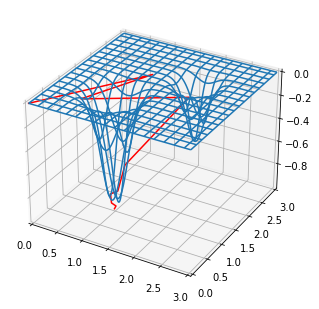

In [91]:
X = np.linspace(-0,3,500)
Y = np.linspace(-0,3,500)
X, Y = np.meshgrid(X, Y)
Z = function(X,Y)
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(xs, ys, zs, color = "red")
ax.plot_wireframe(X, Y, Z, rstride=30, cstride=30)
plt.xlim(-0,3)
plt.ylim(-0,3)
plt.savefig("pos_random_search_part2.png")
plt.show()

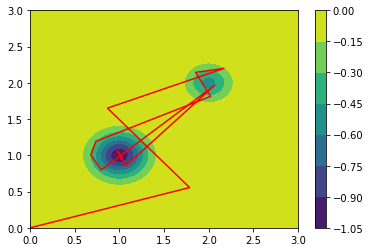

In [51]:
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, Z)
cbar = fig.colorbar(cs)
ax.plot(xs,ys,color = 'red')
plt.xlim(0,3)
plt.ylim(0,3)
plt.savefig("map_random_search_part2.png")
plt.show()

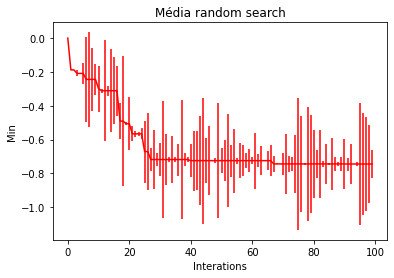

In [128]:
b_lim_min = 0
b_lim_max = 3
rxs1,rys1,rzs1 = random_search(100, function, b_lim_min, b_lim_max)
rxs2,rys2,rzs2 = random_search(100, function, b_lim_min, b_lim_max)
rxs3,rys3,rzs3 = random_search(100, function, b_lim_min, b_lim_max)
rxs4,rys4,rzs4 = random_search(100, function, b_lim_min, b_lim_max)
rxs5,rys5,rzs5 = random_search(100, function, b_lim_min, b_lim_max)

zrandom_mean = [np.mean(i) for i in zip(rzs1,rzs2,rzs3,rzs4,rzs5)]
zrandom_std = [np.std(i) for i in zip(zs1,zs2,zs3,zs4,zs5)]
zrandom_mean = zrandom_mean[:len(zs_mean1)]
zrandom_std = zrandom_std[:len(zrandom_mean)]
t = [i for i in range(len(zrandom_mean))]
plt.errorbar(t, zrandom_mean, zrandom_std,color = 'red')
plt.xlabel('Interations')
plt.title("Média random search")
plt.ylabel('Min')
plt.savefig("media_random_search_part2.png")
plt.show()

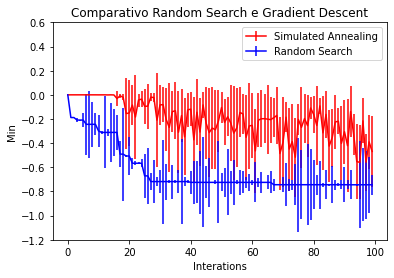

In [226]:
plt.errorbar(t, zs_mean1, zs_std1,color = 'red')
plt.errorbar(t, zrandom_mean, zrandom_std,color = 'blue')
plt.legend(("Simulated Annealing",'Random Search'))
plt.title("Comparativo Random Search e Gradient Descent")
plt.xlabel('Interations')
plt.ylim(-1.2,0.6)
plt.ylabel('Min')
plt.savefig("comparativo_random_simulated.png")
plt.show()